# Libraries

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Given function

In [2]:
def given_function(x):
    return np.exp(-4 * np.sin(x))

# Function plot

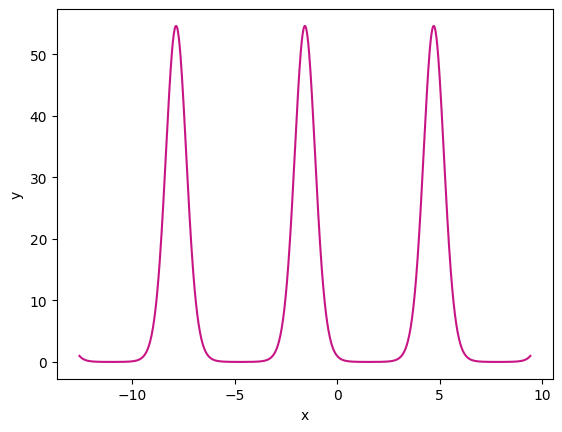

In [3]:
x = np.linspace(-4*np.pi, 3*np.pi, 1000)
y = np.exp(-4 * np.sin(x))

plt.plot(x, y, color='mediumvioletred')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Solution

In [4]:
def approximation_func(X, Y, m):
    n = len(X)
    weights = [1] * n
    G = np.zeros((m, m))
    B = np.zeros(m)
    
    for j in range(m):
        for k in range(m):
            G[j, k] = sum(weights[i] * X[i]**(j+k) for i in range(n))
        B[j] = sum(weights[i] * Y[i] * X[i]**j for i in range(n)) 
    
    A = np.linalg.solve(G, B)
    return lambda x: sum(A[i] * x**i for i in range(m))

def ls_approximation(start, end, n, m):
    X = np.linspace(start, end, n)
    Y = given_function(X)
    ls_result = approximation_func(X, Y, m)
    draw_plot(X, Y, start, end, n, m, ls_result)
    

# Plot 

In [5]:
def draw_plot(x, y, start, end, n, m, function):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, color="black")
    X = np.arange(start, end+0.01, 0.01)
    plt.plot(X, given_function(X), color="mediumvioletred")
    plt.plot(X, function(X), color="darkmagenta", linewidth=3)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    

# Errors

In [13]:
def max_error(Y1, Y2):
    return np.max([abs(Y1[i] - Y2[i]) for i in range(len(Y1))])

def sum_square_error(Y1, Y2):
    return sum([(Y1[i] - Y2[i])**2 for i in range(len(Y1))])

def calculate_error(start, stop, m, nodes):
    result = [None for _ in range(2 * len(m) * len(nodes))]

    total_X = np.linspace(start, stop, 1000)
    func_val = given_function(total_X)
    idx = 0

    for n in nodes:
        X = np.linspace(start, stop, n)
        Y = given_function(X)
        for i in m:
            ls_app = approximation_func(X, Y, i)
            ls_approximation_result = ls_app(total_X)
            result[idx] = max_error(ls_approximation_result, func_val)
            result[idx + 1] = sum_square_error(ls_approximation_result, func_val)
            idx += 2
            
            
        df = pd.DataFrame(data={"n": [val for val in nodes for _ in range(len(m))],
                 "m": m * len(nodes),
                 "max error": result[::2],
                 "sum square error": result[1::2]})
    
    return df

In [14]:
start = -4 * np.pi
end = 3 * np.pi

max_pol_degree = [3, 5, 6, 8, 11, 15, 20, 25, 30, 35]
points_number= [10, 15, 20, 25, 30, 35]

df = calculate_error(start, end, points_number, max_pol_degree)
df

,n,m,max error,sum square error
0,3,10,54.322555,1.047336e+06
1,3,15,200.915800,1.254718e+07
2,3,20,69.404793,1.726708e+06
3,3,25,81.910722,2.063513e+06
4,3,30,54.339890,1.487669e+06
5,3,35,83.169526,2.474851e+06
6,5,10,124.922044,2.276067e+06
7,5,15,103.190879,2.685195e+06
8,5,20,50.047850,8.681321e+05
9,5,25,680.875653,3.756162e+07


# Main function




Liczba punktów: 10, Maksymalny stopień 3



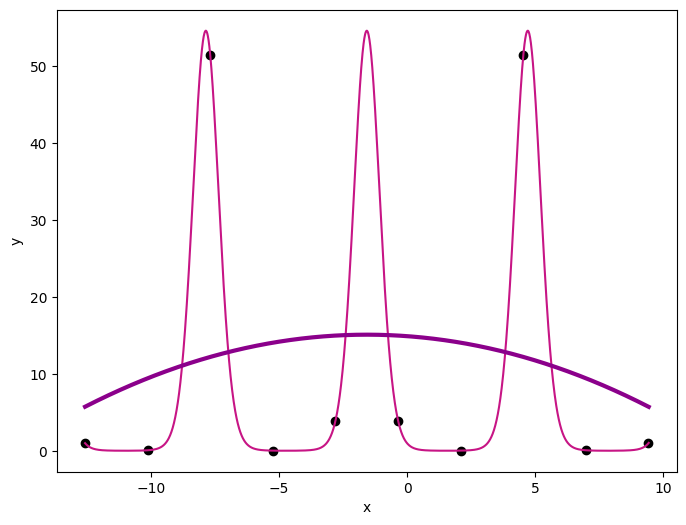




Liczba punktów: 15, Maksymalny stopień 3



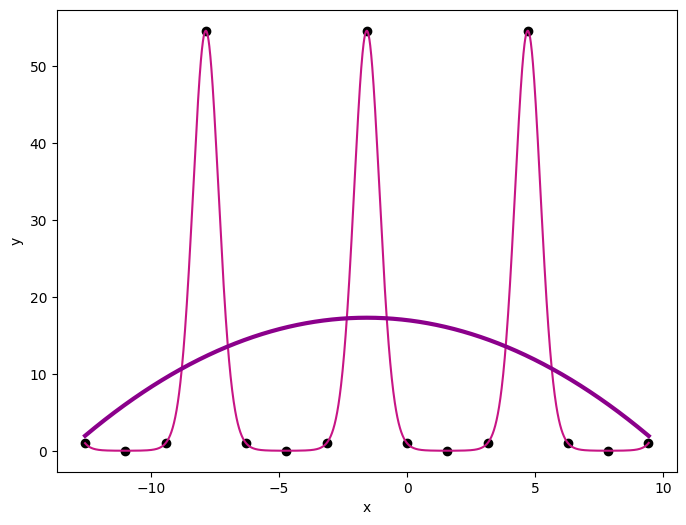




Liczba punktów: 20, Maksymalny stopień 3



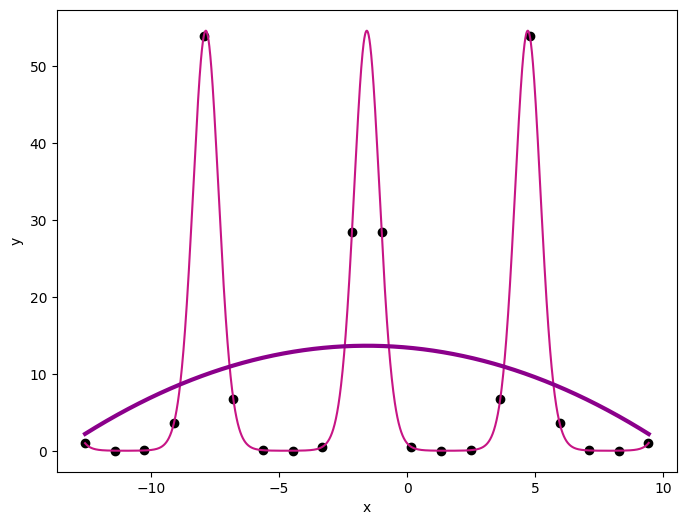




Liczba punktów: 25, Maksymalny stopień 3



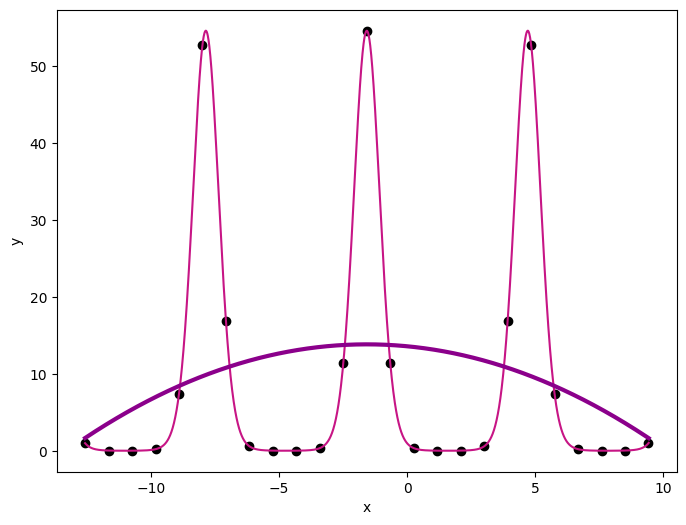




Liczba punktów: 30, Maksymalny stopień 3



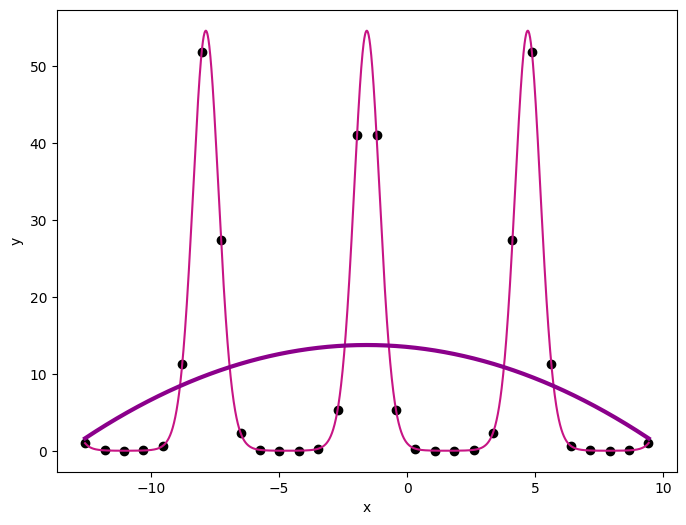




Liczba punktów: 35, Maksymalny stopień 3



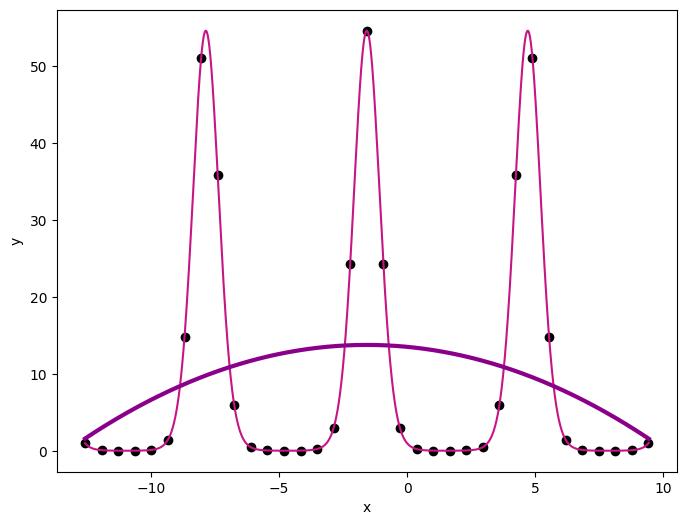




Liczba punktów: 10, Maksymalny stopień 5



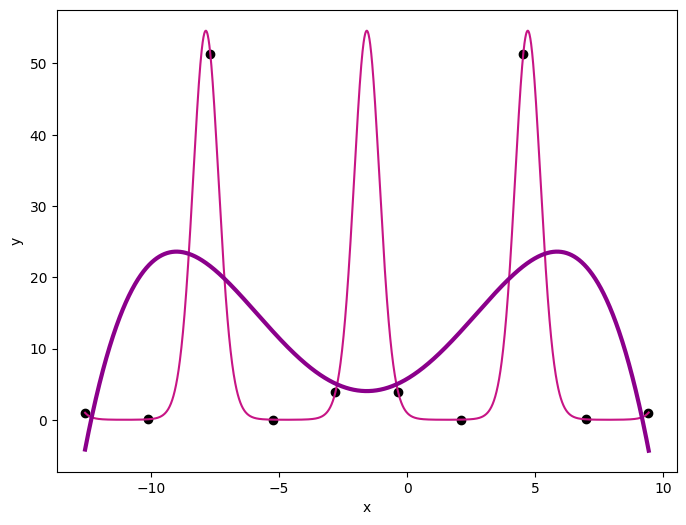




Liczba punktów: 15, Maksymalny stopień 5



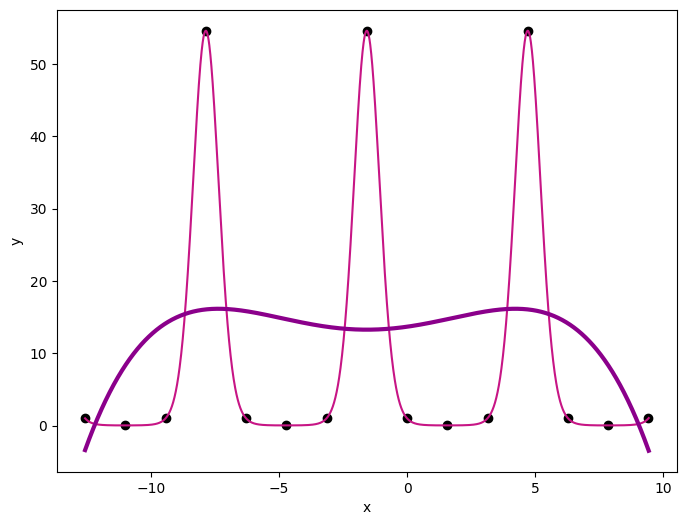




Liczba punktów: 20, Maksymalny stopień 5



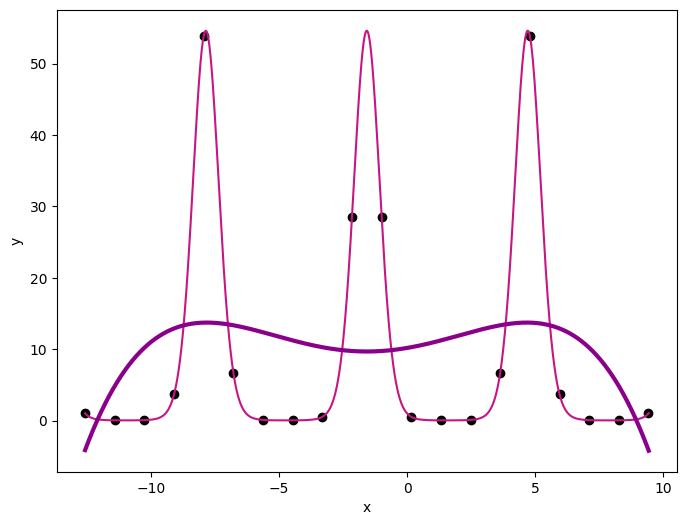




Liczba punktów: 25, Maksymalny stopień 5



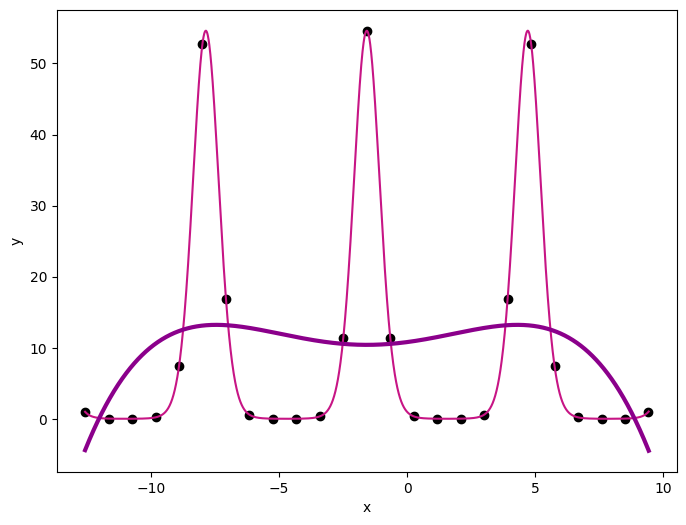




Liczba punktów: 30, Maksymalny stopień 5



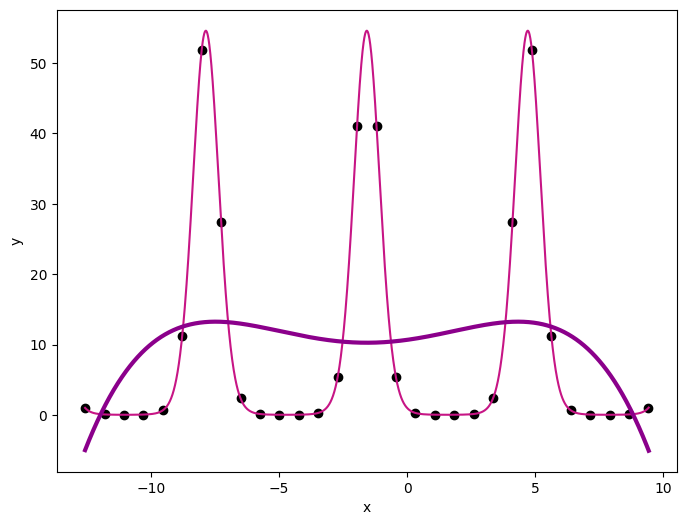




Liczba punktów: 35, Maksymalny stopień 5



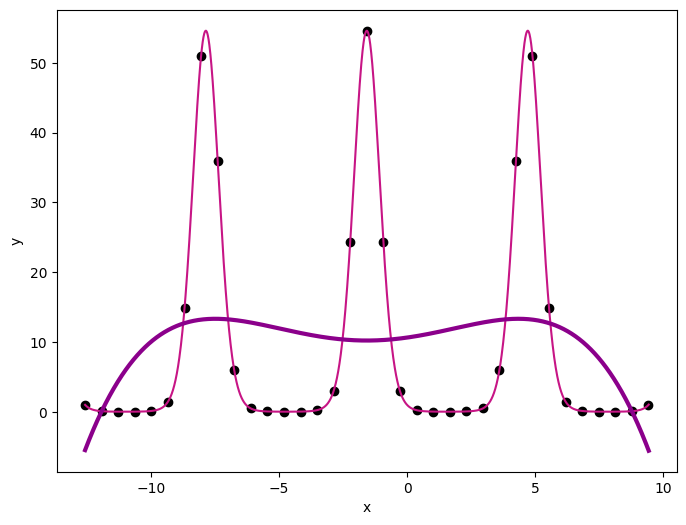




Liczba punktów: 10, Maksymalny stopień 6



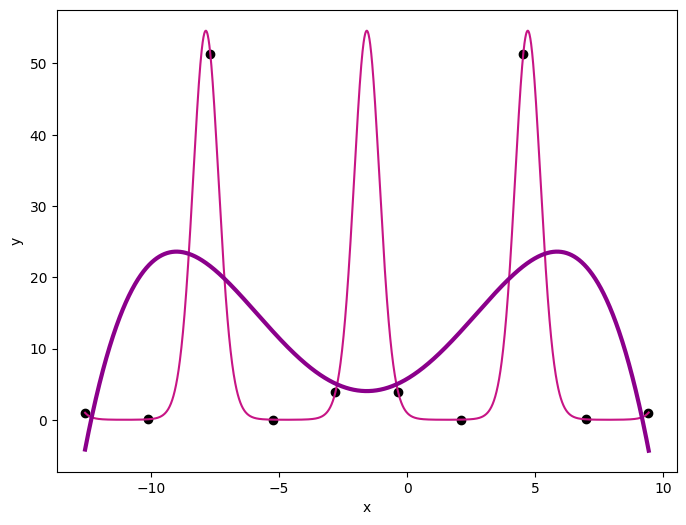




Liczba punktów: 15, Maksymalny stopień 6



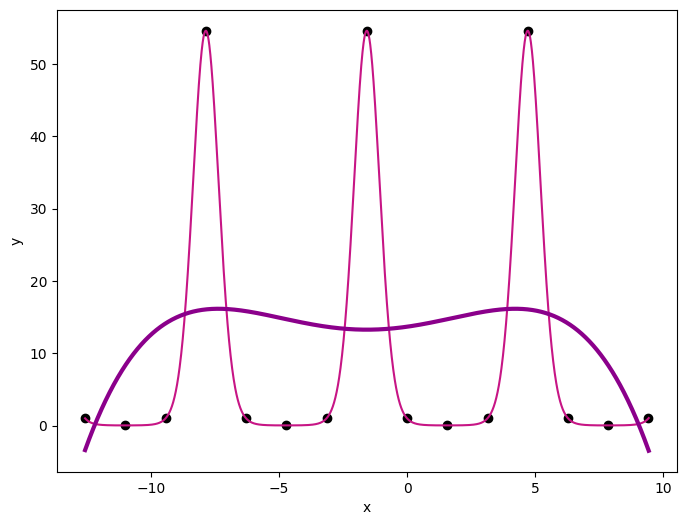




Liczba punktów: 20, Maksymalny stopień 6



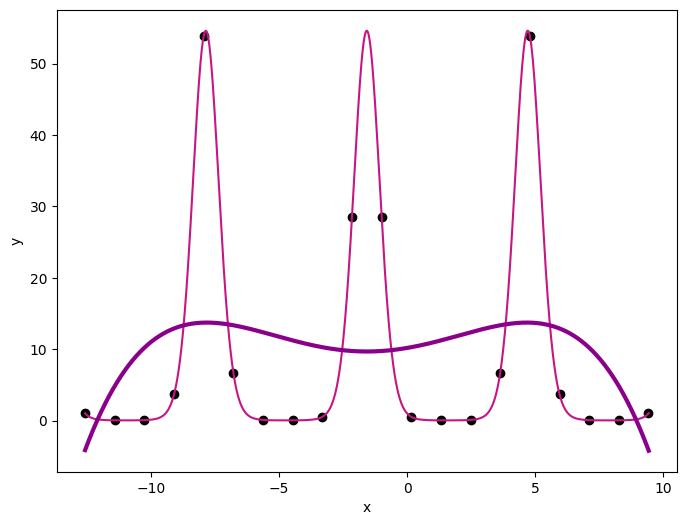




Liczba punktów: 25, Maksymalny stopień 6



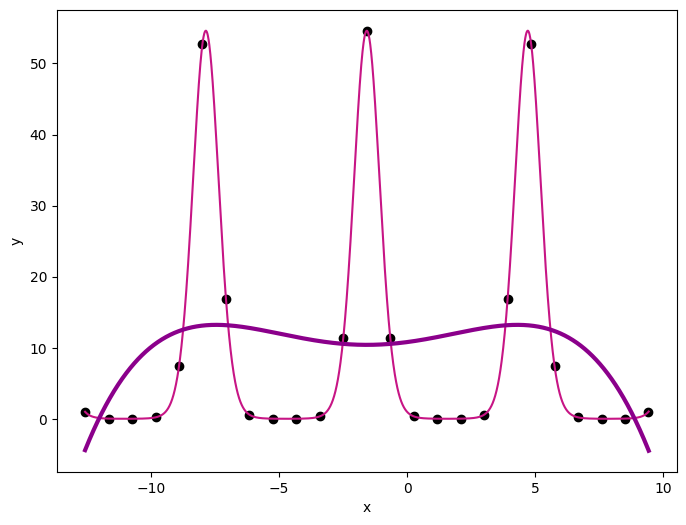




Liczba punktów: 30, Maksymalny stopień 6



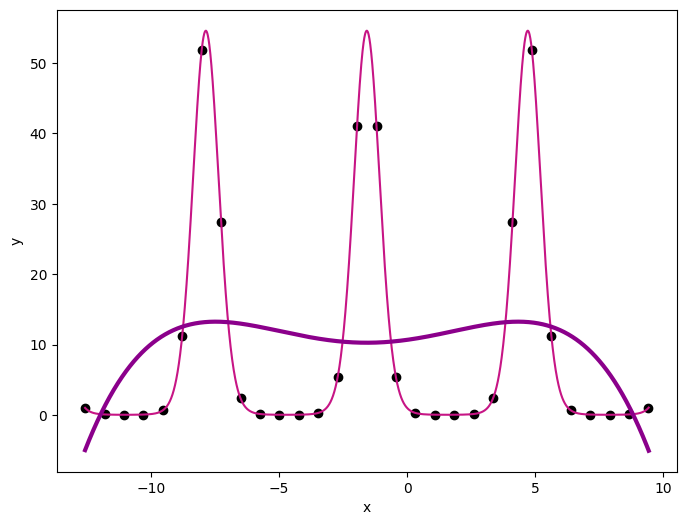




Liczba punktów: 35, Maksymalny stopień 6



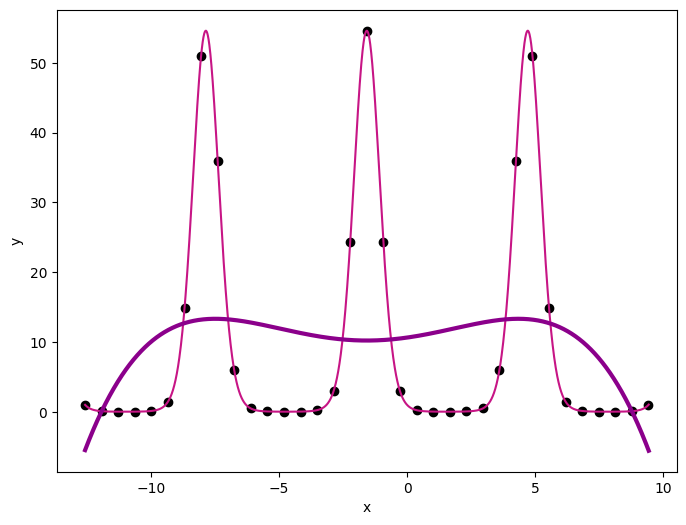




Liczba punktów: 10, Maksymalny stopień 8



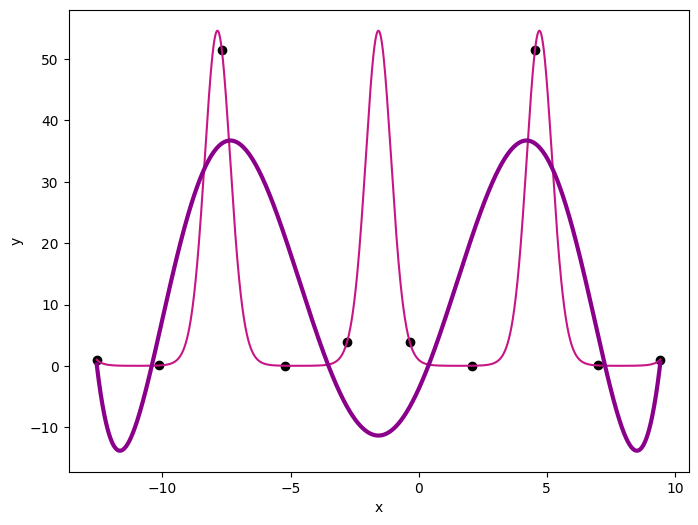




Liczba punktów: 15, Maksymalny stopień 8



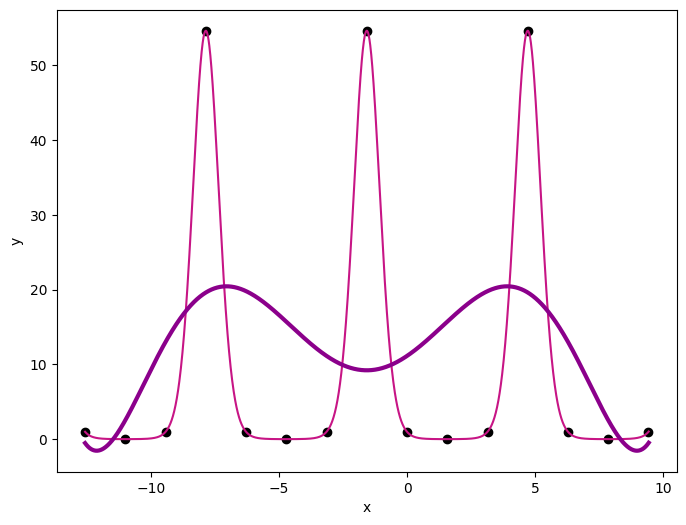




Liczba punktów: 20, Maksymalny stopień 8



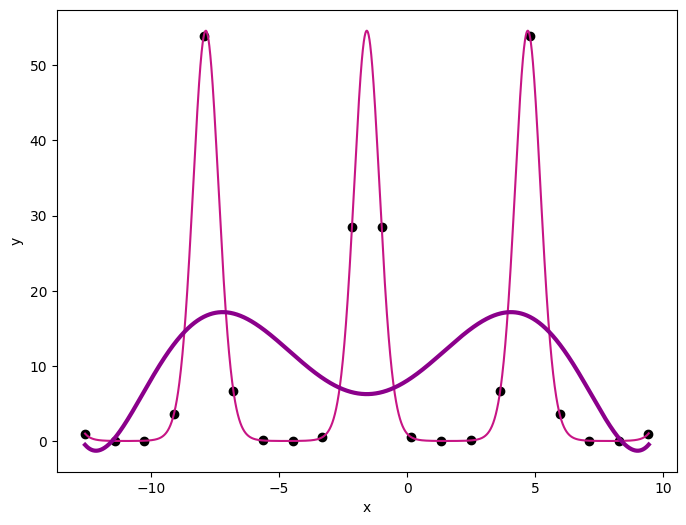




Liczba punktów: 25, Maksymalny stopień 8



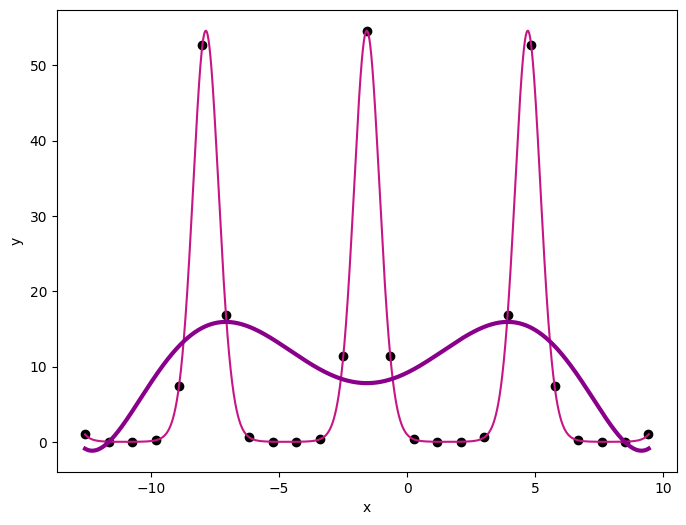




Liczba punktów: 30, Maksymalny stopień 8



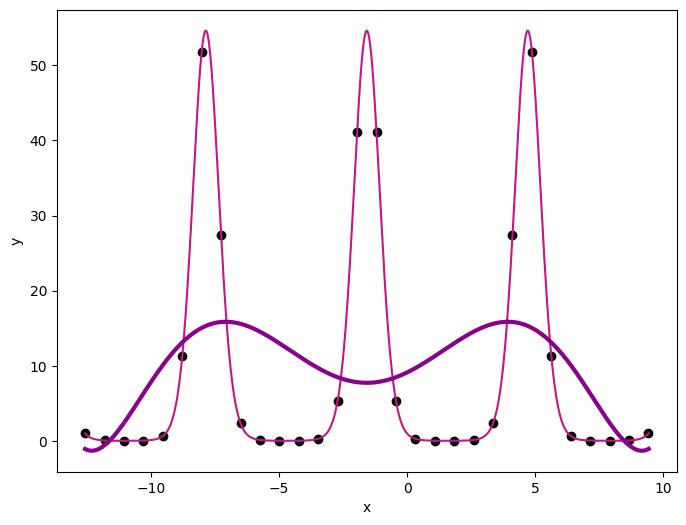




Liczba punktów: 35, Maksymalny stopień 8



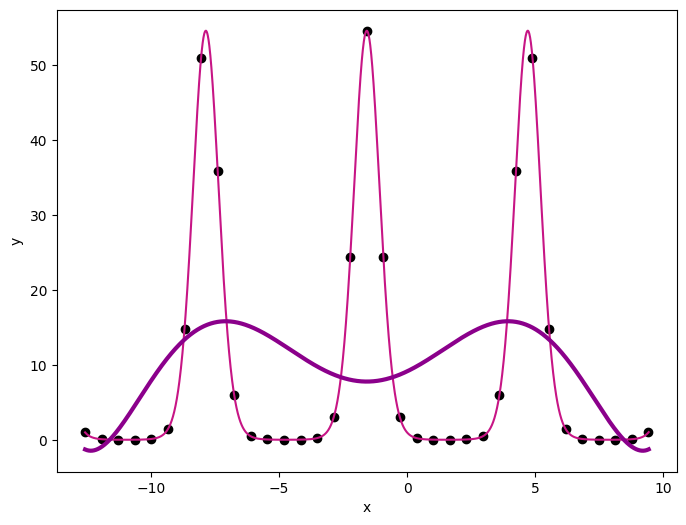




Liczba punktów: 10, Maksymalny stopień 11



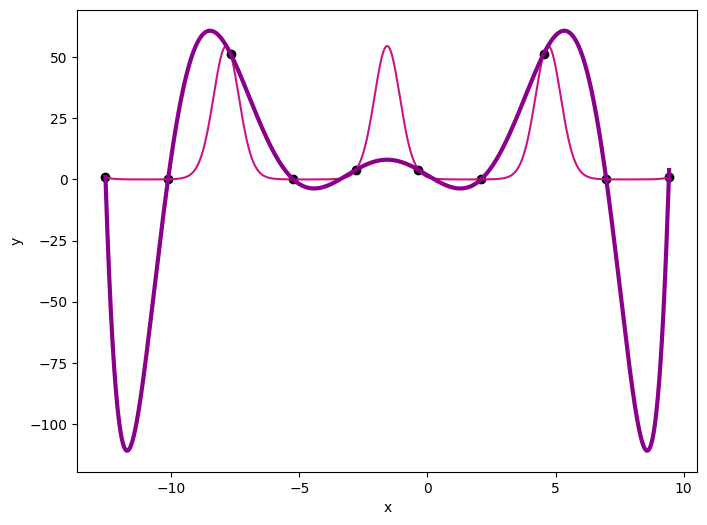




Liczba punktów: 15, Maksymalny stopień 11



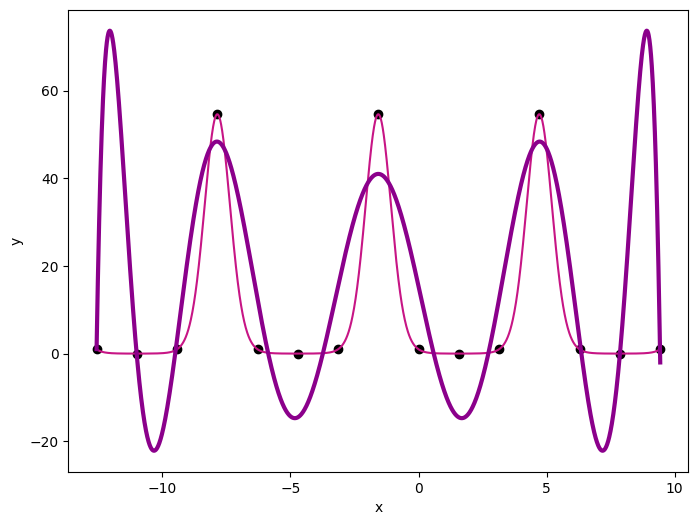




Liczba punktów: 20, Maksymalny stopień 11



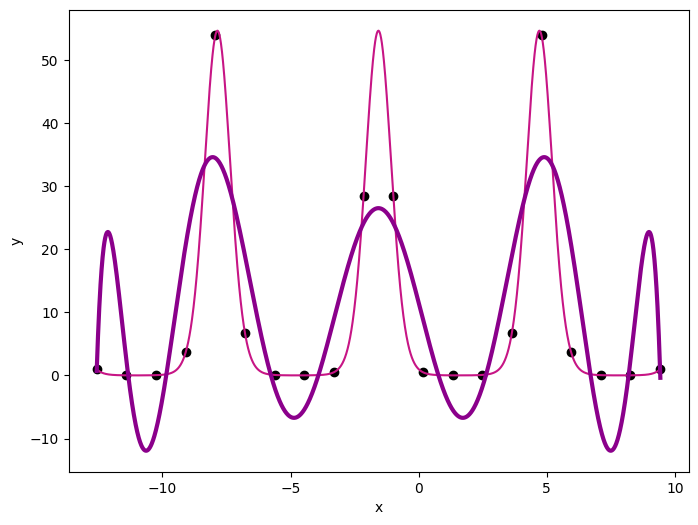




Liczba punktów: 25, Maksymalny stopień 11



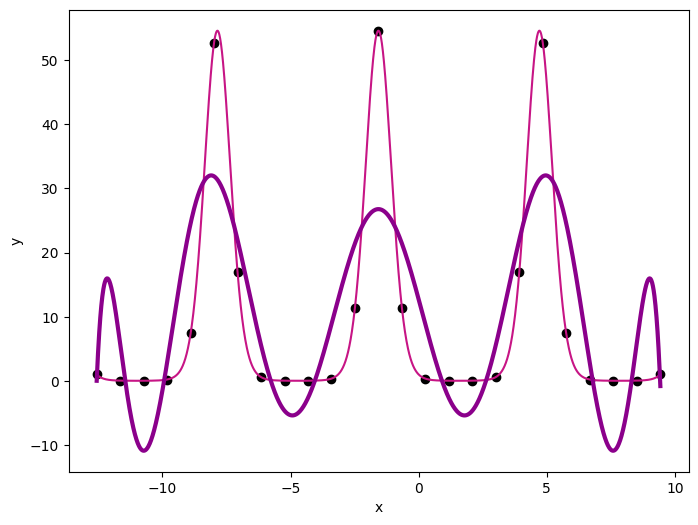




Liczba punktów: 30, Maksymalny stopień 11



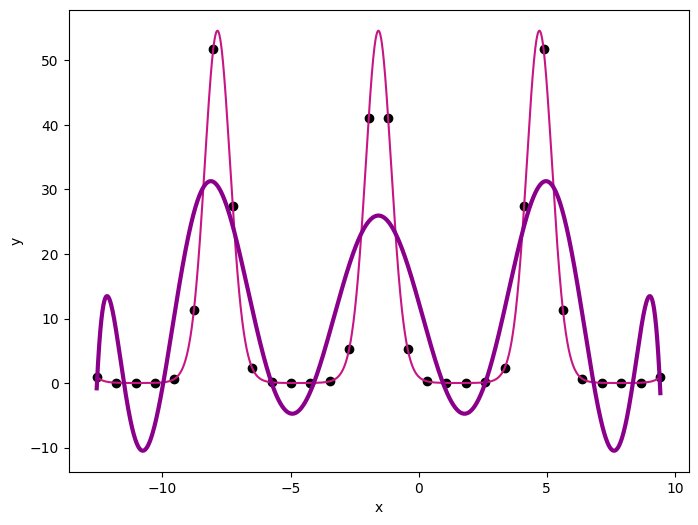




Liczba punktów: 35, Maksymalny stopień 11



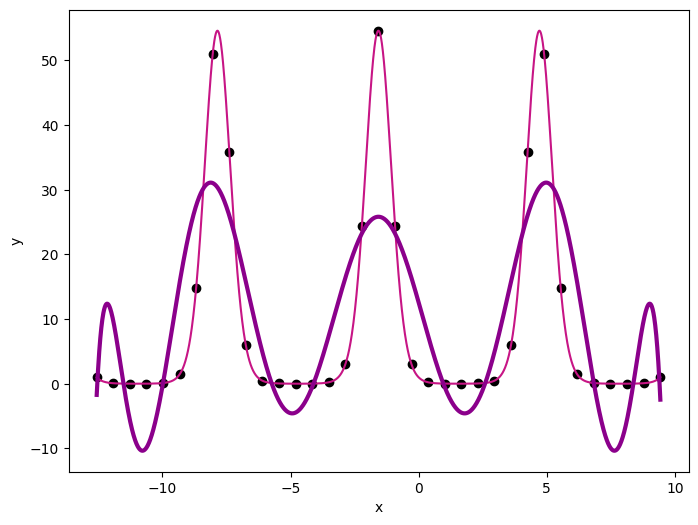




Liczba punktów: 10, Maksymalny stopień 15



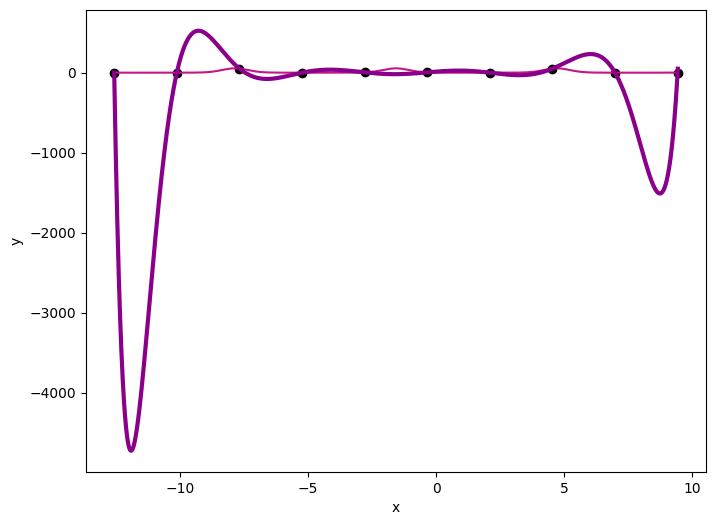




Liczba punktów: 15, Maksymalny stopień 15



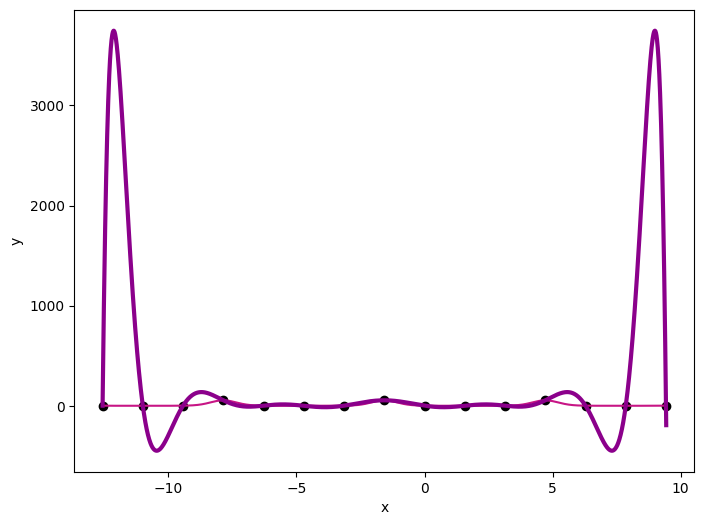




Liczba punktów: 20, Maksymalny stopień 15



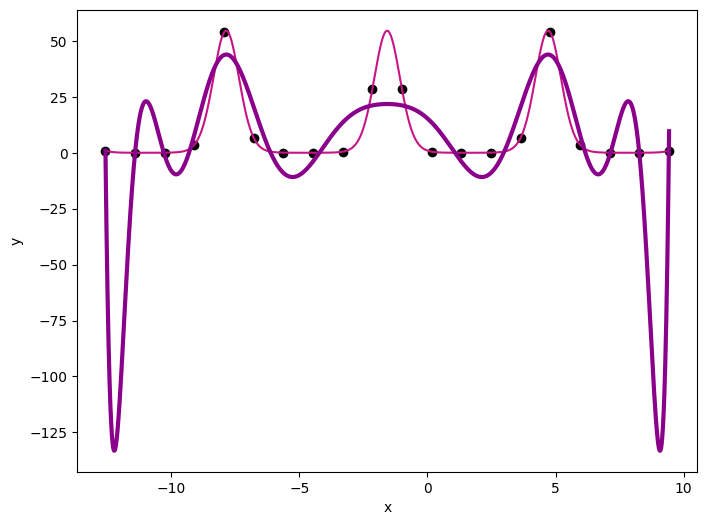




Liczba punktów: 25, Maksymalny stopień 15



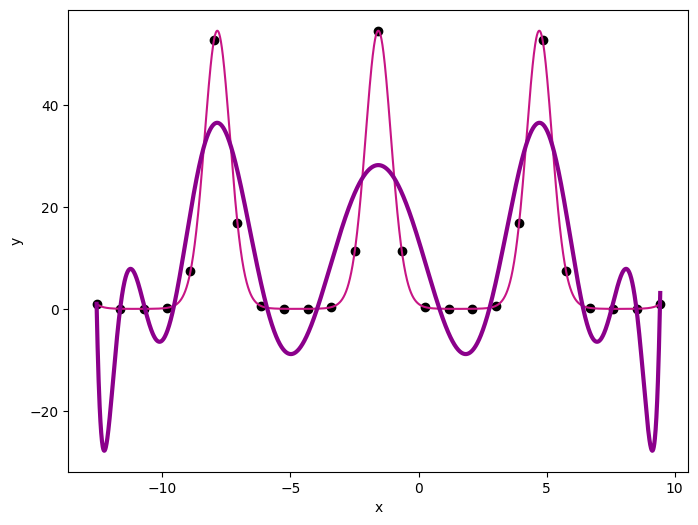




Liczba punktów: 30, Maksymalny stopień 15



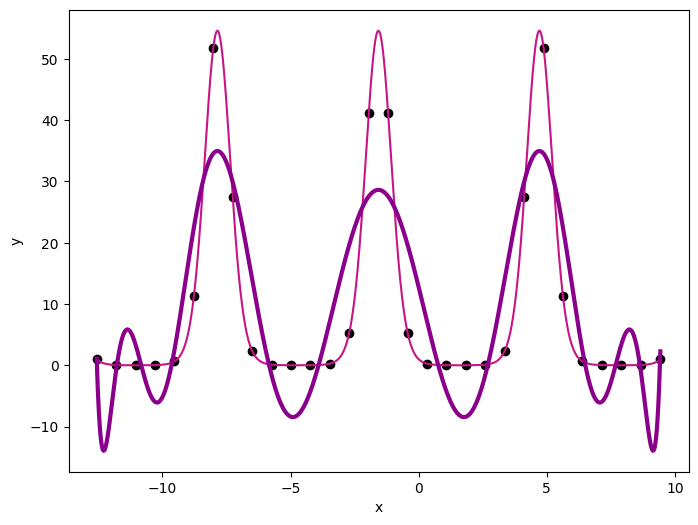




Liczba punktów: 35, Maksymalny stopień 15



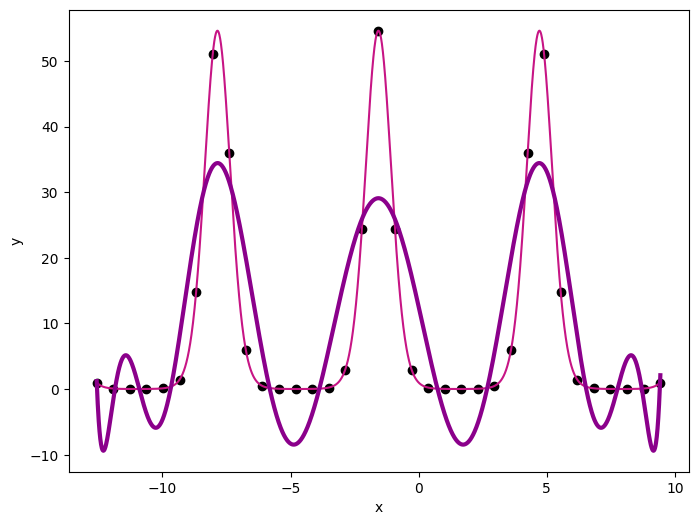




Liczba punktów: 10, Maksymalny stopień 20



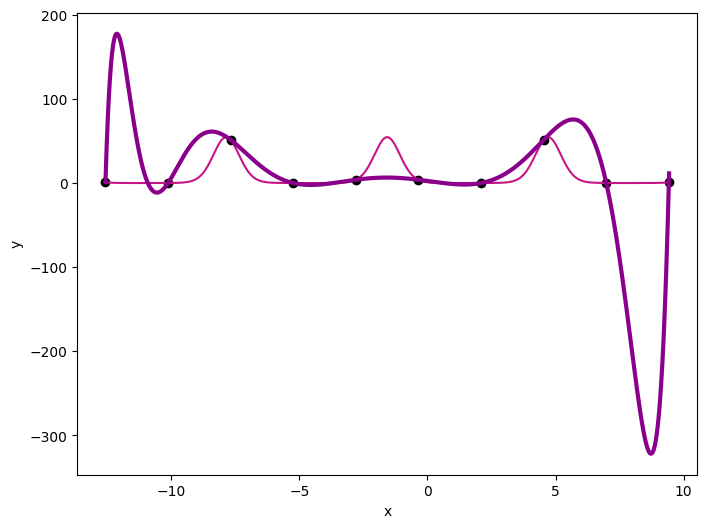




Liczba punktów: 15, Maksymalny stopień 20



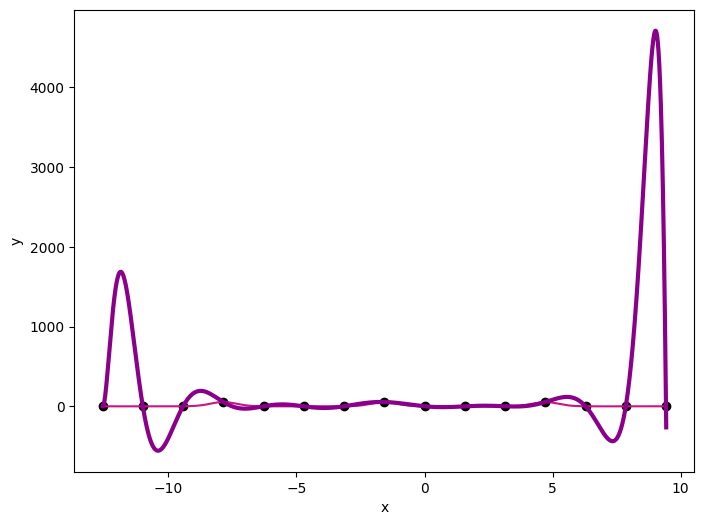




Liczba punktów: 20, Maksymalny stopień 20



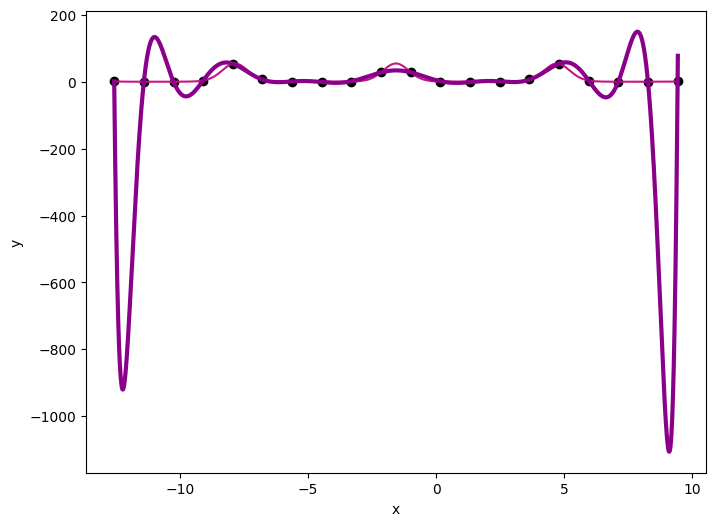




Liczba punktów: 25, Maksymalny stopień 20



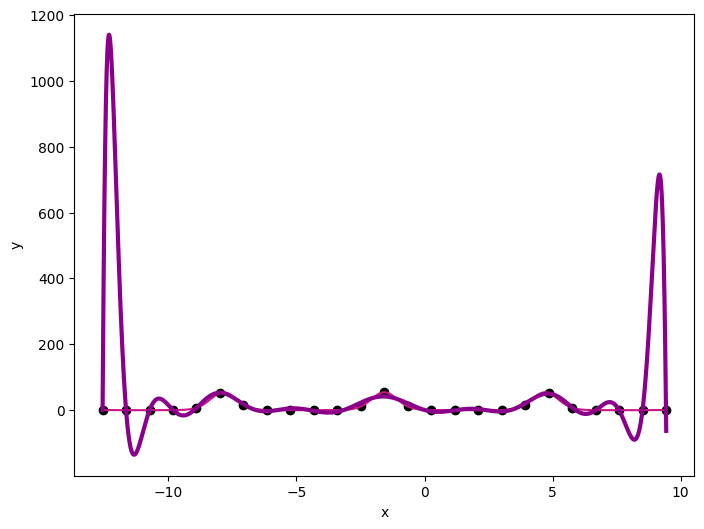




Liczba punktów: 30, Maksymalny stopień 20



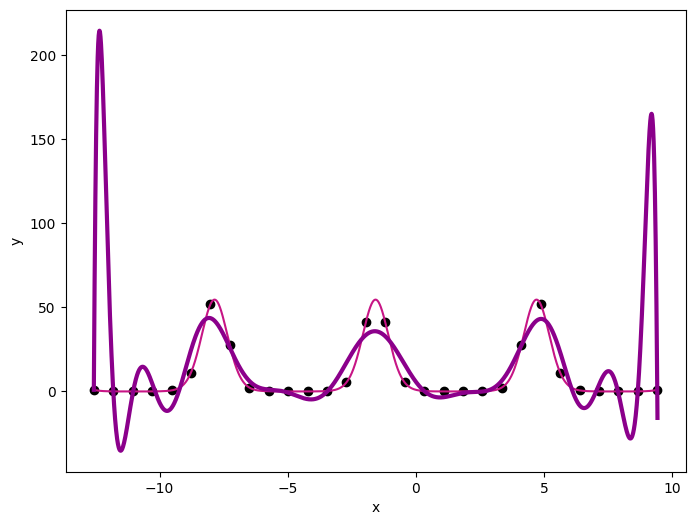




Liczba punktów: 35, Maksymalny stopień 20



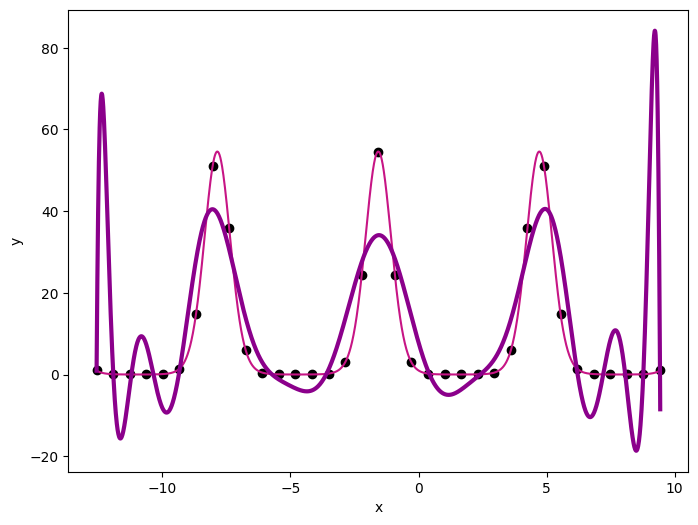




Liczba punktów: 10, Maksymalny stopień 25



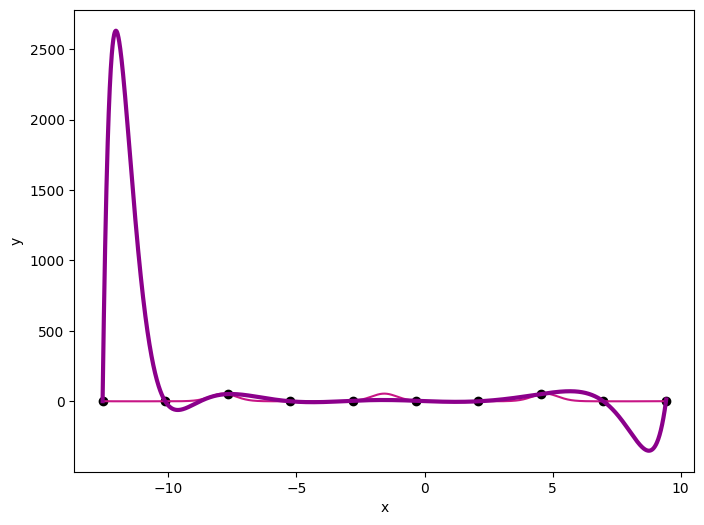




Liczba punktów: 15, Maksymalny stopień 25



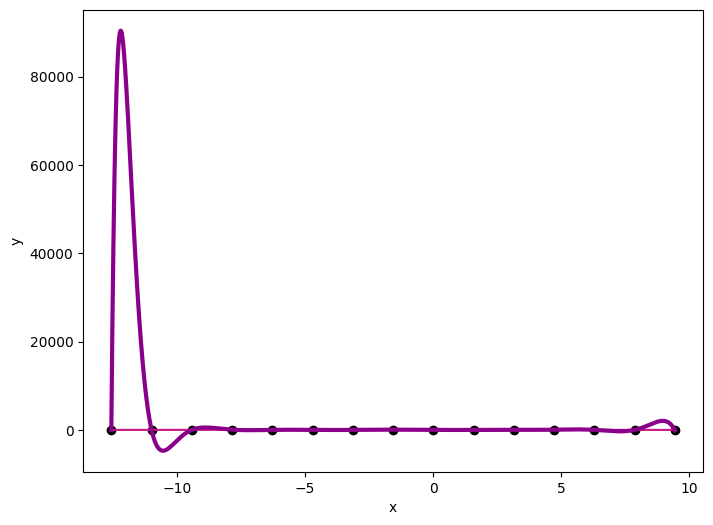




Liczba punktów: 20, Maksymalny stopień 25



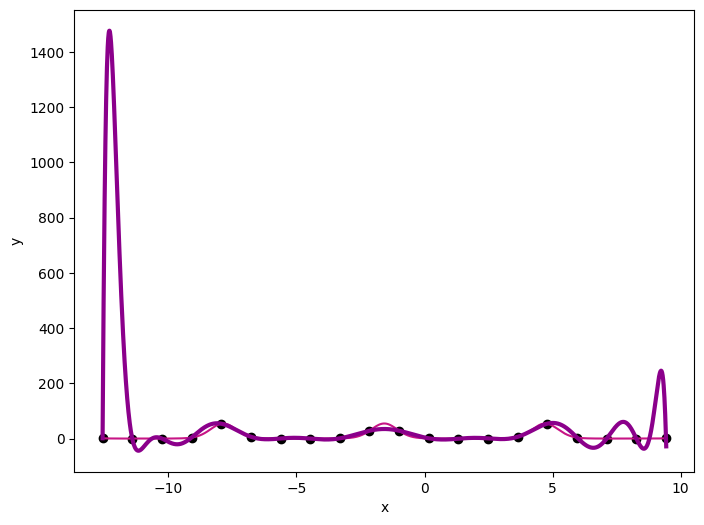




Liczba punktów: 25, Maksymalny stopień 25



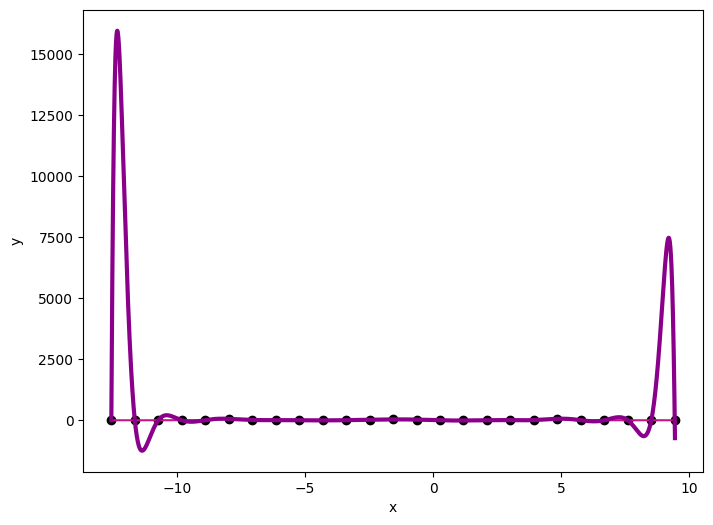




Liczba punktów: 30, Maksymalny stopień 25



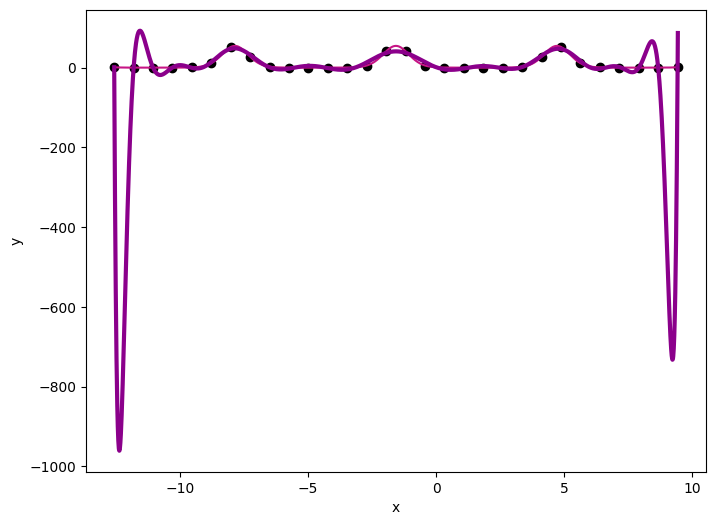




Liczba punktów: 35, Maksymalny stopień 25



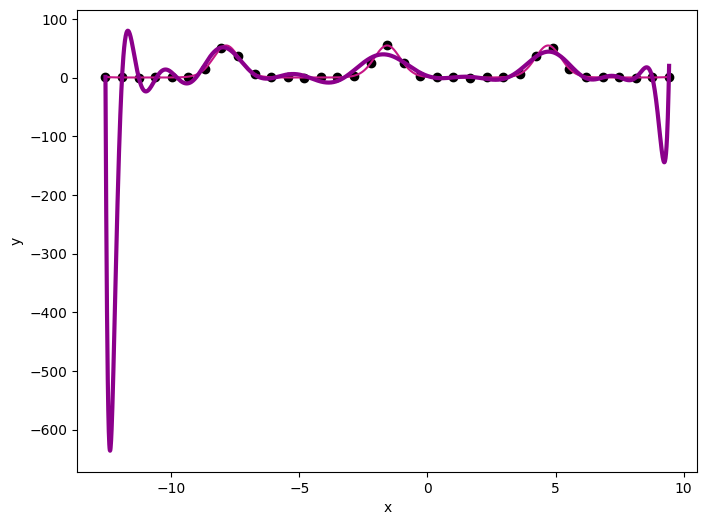




Liczba punktów: 10, Maksymalny stopień 30



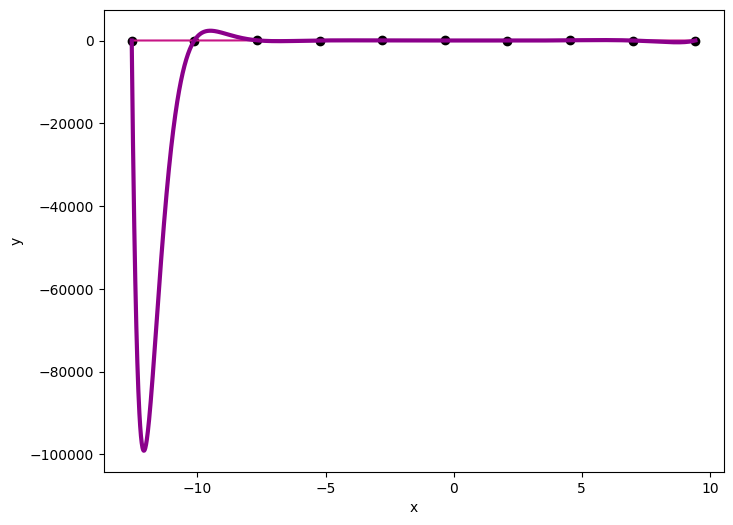




Liczba punktów: 15, Maksymalny stopień 30



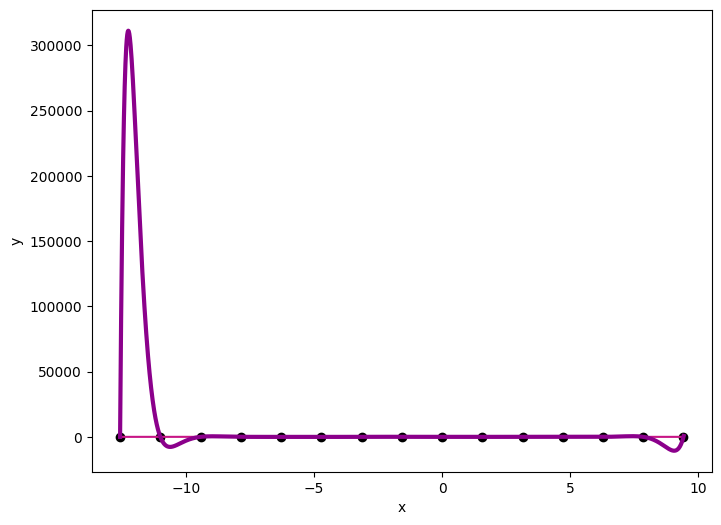




Liczba punktów: 20, Maksymalny stopień 30



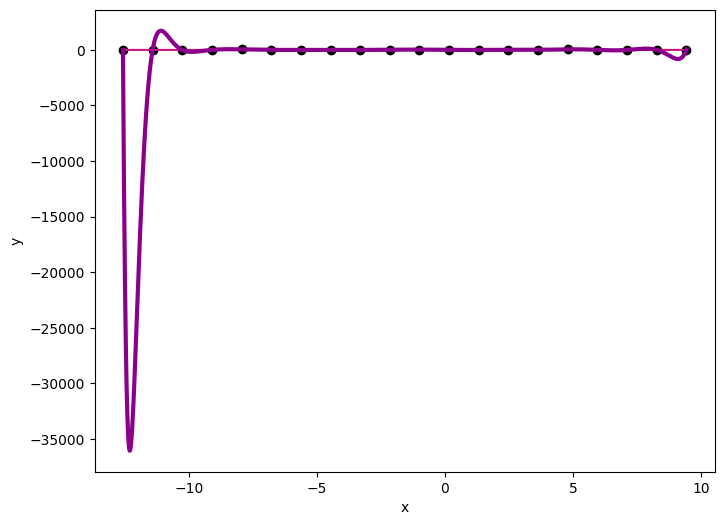




Liczba punktów: 25, Maksymalny stopień 30



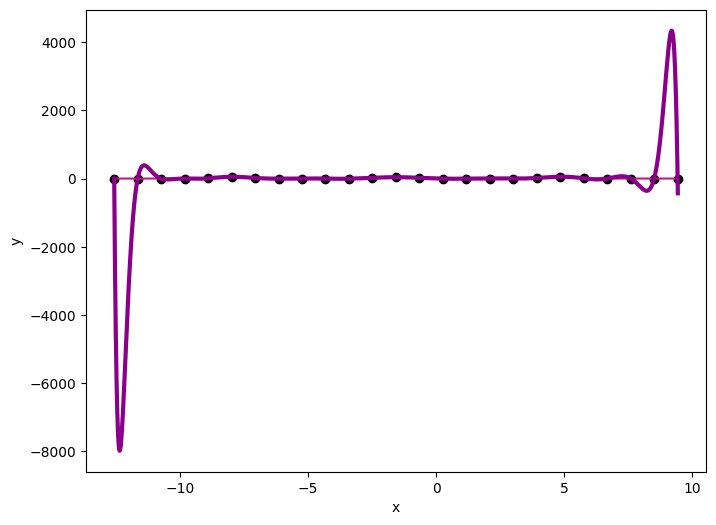




Liczba punktów: 30, Maksymalny stopień 30



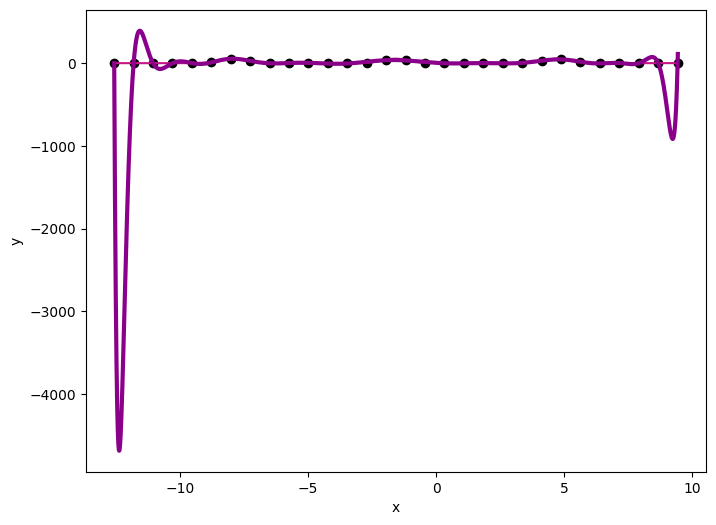




Liczba punktów: 35, Maksymalny stopień 30



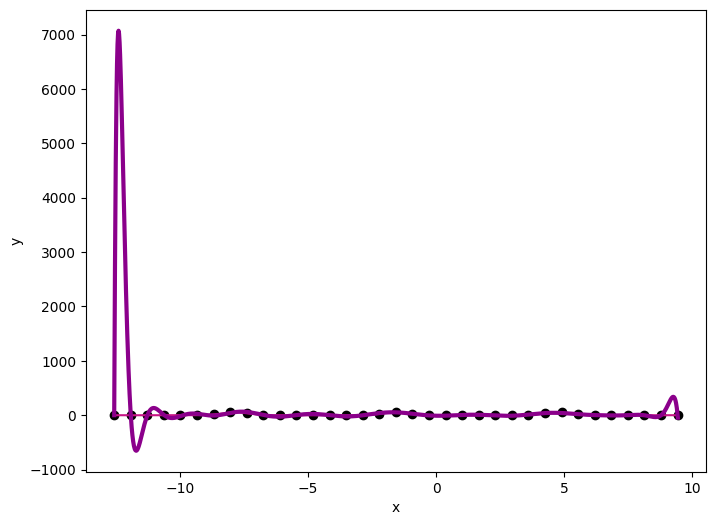




Liczba punktów: 10, Maksymalny stopień 35



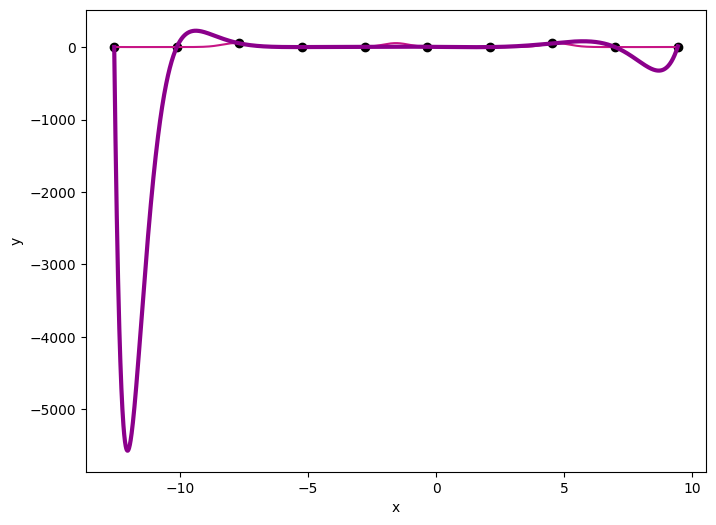




Liczba punktów: 15, Maksymalny stopień 35



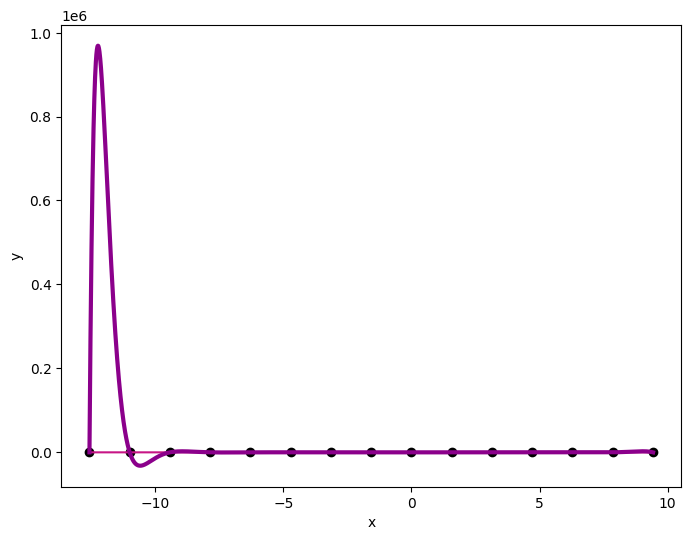




Liczba punktów: 20, Maksymalny stopień 35



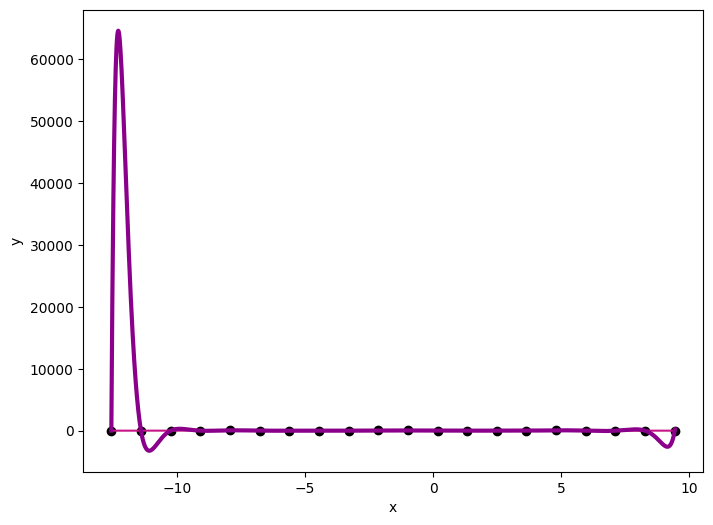




Liczba punktów: 25, Maksymalny stopień 35



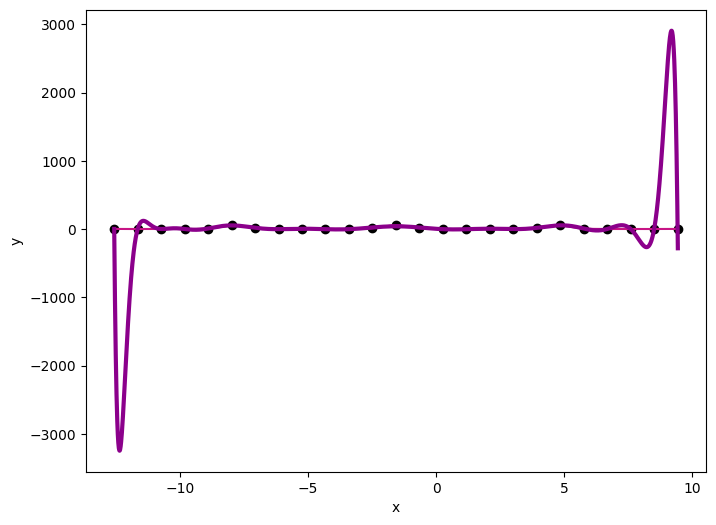




Liczba punktów: 30, Maksymalny stopień 35



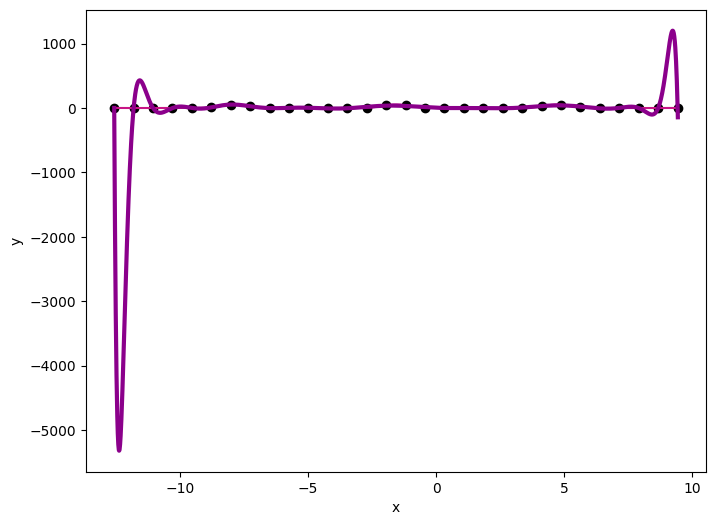




Liczba punktów: 35, Maksymalny stopień 35



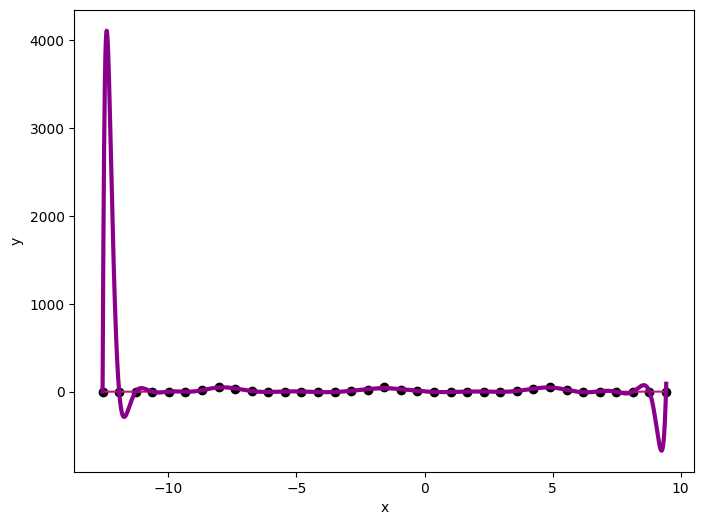

In [15]:
start = -4 * np.pi
end = 3 * np.pi

max_pol_degree = [3, 5, 6, 8, 11, 15, 20, 25, 30, 35]
points_number= [10, 15, 20, 25, 30, 35]

for m in max_pol_degree:
    for n in points_number:
        print(f"\n\n\nLiczba punktów: {n}, Maksymalny stopień {m}\n")
        ls_approximation(start, end, n, m)